<a href="https://colab.research.google.com/github/ajdhiman/Google-Colab/blob/main/Deep_Learning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print("Tensorflow Version:",tf.__version__)

Tensorflow Version: 2.12.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Classification Probem**

In [3]:
dataset=pd.read_csv(r'Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
x=dataset.iloc[:,3:13].values
x=pd.DataFrame(x,columns=['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary'])


In [6]:
y=dataset.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
geography=pd.get_dummies(x['Geography'],drop_first=True)
gender=pd.get_dummies(x['Gender'],drop_first=True)

In [9]:
x=x.drop(['Geography','Gender'],axis=1)

In [10]:
x=pd.concat([x,geography,gender],axis=1)

In [11]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.0,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.8,3,1,0,113931.57,0,0,0
3,699,39,1,0.0,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.1,0,1,0


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [13]:
o_features=[f for f in x_train.columns if x_train[f].dtype =='O']
for col in o_features:
    x_train[col] = x_train[col].astype(float)
    x_test[col] = x_test[col].astype(float)


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ReLU
from tensorflow.keras.layers import Dropout

In [16]:
classifier=Sequential()

In [17]:
classifier.add(Dense(units=10,activation='relu', input_shape=(11,)))

In [18]:
classifier.add(Dense(units=10,activation='relu'))

In [19]:
classifier.add(Dense(units=7,activation='relu'))

In [20]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [21]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 7)                 77        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 315
Trainable params: 315
Non-trainable params: 0
_________________________________________________________________


In [22]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)

In [23]:
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [24]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=0.0001,patience=5,verbose=1,mode="auto",baseline=None,restore_best_weights=False)

In [25]:
from imblearn.over_sampling import SMOTE
x_train = np.array(x_train)
y_train = np.array(y_train)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [26]:
#model_history=classifier.fit(np.array(x_train),y_train,validation_split=0.33,batch_size=10,epochs=100,callbacks=early_stopping)
model_history=classifier.fit(np.array(x_train_scaled),y_train,validation_data=(x_test_scaled,y_test),batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
700/700 [==============================] - 15s 6ms/step - loss: 0.4341 - accuracy: 0.8139 - val_loss: 0.4115 - val_accuracy: 0.8270
Epoch 2/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3857 - accuracy: 0.8354 - val_loss: 0.3583 - val_accuracy: 0.8573
Epoch 3/100
700/700 [==============================] - 4s 5ms/step - loss: 0.3623 - accuracy: 0.8534 - val_loss: 0.3594 - val_accuracy: 0.8590
Epoch 4/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3569 - accuracy: 0.8541 - val_loss: 0.3597 - val_accuracy: 0.8520
Epoch 5/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3530 - accuracy: 0.8561 - val_loss: 0.3493 - val_accuracy: 0.8577
Epoch 6/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3497 - accuracy: 0.8590 - val_loss: 0.3519 - val_accuracy: 0.8627
Epoch 7/100
700/700 [==============================] - 3s 4ms/step - loss: 0.3488 - accuracy: 0.8591 - val_loss: 0.3522 - val_accuracy: 0.855

In [27]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<function matplotlib.pyplot.show(close=None, block=None)>

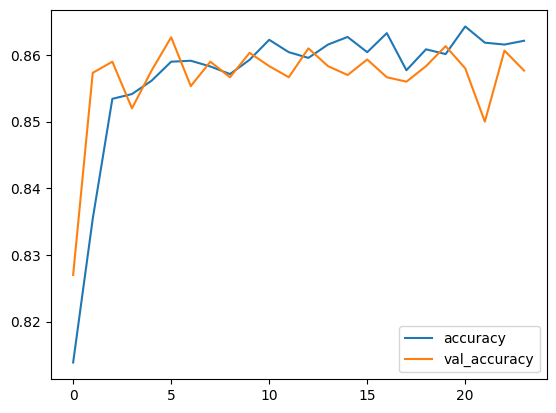

In [28]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show

In [29]:
y_pred=classifier.predict(x_test_scaled)
y_pred=(y_pred>=0.5)

94/94 [==============================] - 0s 1ms/step


In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix
score=accuracy_score(y_pred,y_test)
cm=confusion_matrix(y_pred,y_test)

In [31]:
unique_values, counts = np.unique(y_pred, return_counts=True)
for value, count in zip(unique_values, counts):
  print(f"{value}: {count}")

False: 2632
True: 368


In [32]:
cm

array([[2292,  340],
       [  87,  281]])

In [33]:
score

0.8576666666666667

In [34]:
classifier.get_weights()

[array([[ 0.3037683 ,  0.10485292, -0.56049234,  0.51156986,  0.0631545 ,
          1.9712732 , -0.3341999 ,  0.1180193 , -0.03224332,  0.9404255 ],
        [-0.03806093, -0.5019086 ,  0.96530646, -1.3576623 , -2.7327325 ,
         -0.07600752,  2.1307635 ,  1.3510425 , -2.7947068 , -2.0796149 ],
        [-0.28620383, -0.2774258 ,  0.05475772, -1.3021997 ,  0.6684208 ,
          0.79207885, -0.05122683,  1.3646957 ,  0.01805997, -0.34074283],
        [ 1.2459095 , -1.7590926 , -0.991654  ,  2.0655065 ,  0.47797662,
         -1.1913915 ,  0.2215262 ,  0.16632861,  0.09429524, -0.45587522],
        [ 3.4071581 , -0.06117446, -3.8995726 , -0.93158984, -0.0606834 ,
         -0.03451522, -0.2829471 , -0.41356137, -0.00991694, -1.6681621 ],
        [ 0.30921432,  0.23012656,  0.31821838,  0.4125872 , -0.3168254 ,
          0.12294401, -0.23857053,  1.1994591 ,  0.19806986,  1.30148   ],
        [-0.16232392,  2.1677032 , -1.3271819 ,  0.57123166, -1.0847236 ,
         -0.6403517 ,  1.2876433

In [35]:
classifier.save_weights('model_weights.h5')

**Regression Problem**